       numeric_column  value_column
count        5.000000      5.000000
mean        30.000000    200.000000
std         15.811388     79.056942
min         10.000000    100.000000
25%         20.000000    150.000000
50%         30.000000    200.000000
75%         40.000000    250.000000
max         50.000000    300.000000


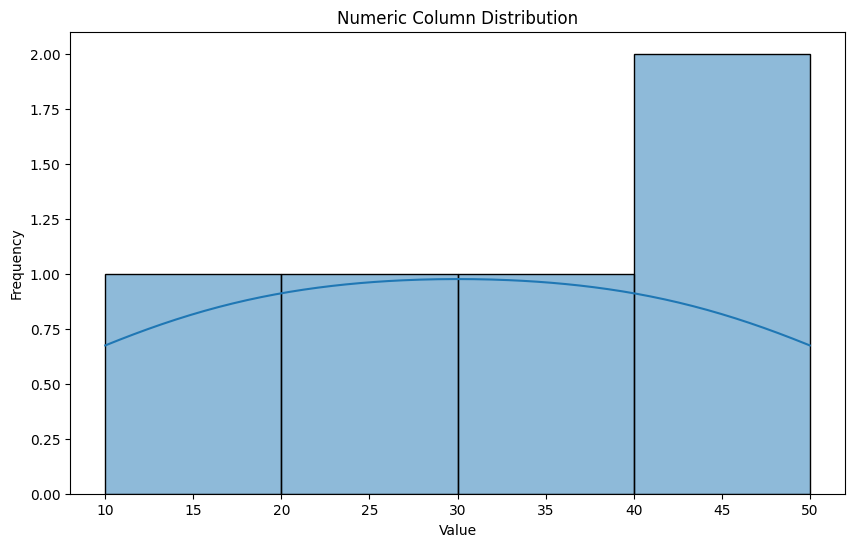

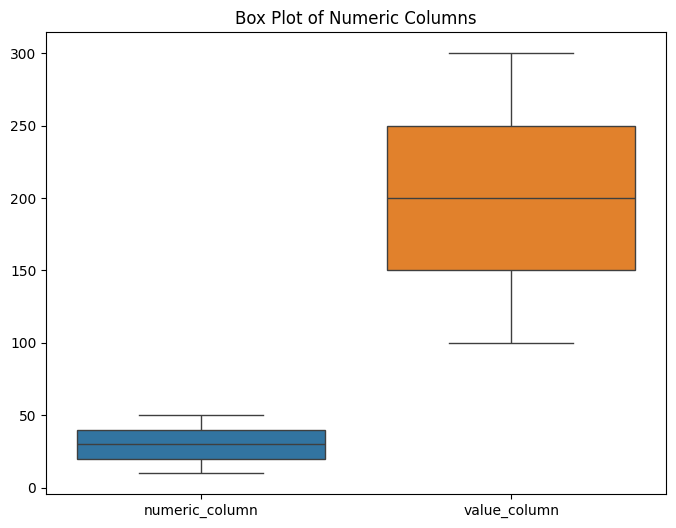

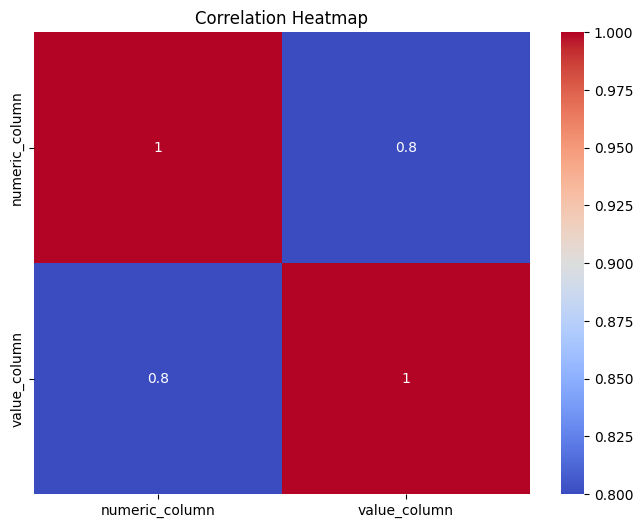

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 (예: csv 파일 사용)
df = pd.read_csv('data.csv')

# 수치형 열만 선택하여 결측값 처리
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 주요 통계
print(df.describe())

# 수치형 변수 분포 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['numeric_column'], kde=True)
plt.title('Numeric Column Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.savefig('numeric_column_histogram.png')  # 결과물 저장
plt.show()

# 상자 그림 (Box Plot) 생성
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot of Numeric Columns')
plt.savefig('box_plot.png')
plt.show()

# 상관 히트맵
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number'])  # 수치형 열만 선택
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()


In [14]:
import sqlite3

# SQLite 데이터베이스 연결
conn = sqlite3.connect('database.db')
cursor = conn.cursor()

# SQL 테이블 생성 및 샘플 데이터 삽입 (없을 경우)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS table_name (
        id INTEGER PRIMARY KEY,
        category_column TEXT,
        numeric_column REAL
    )
''')
sample_data = [('A', 10), ('B', 20), ('A', 30), ('B', 40), ('C', 50)]
cursor.executemany('INSERT INTO table_name (category_column, numeric_column) VALUES (?, ?)', sample_data)
conn.commit()

# SQL 쿼리 실행
query = '''
SELECT category_column, COUNT(*) as count
FROM table_name
GROUP BY category_column
ORDER BY count DESC
'''
results = pd.read_sql(query, conn)
print(results)

# SQL 쿼리 후 연결 종료
conn.close()


  category_column  count
0               B      2
1               A      2
2               C      1


In [20]:
import folium

# 중심 위치 설정 (예: 서울)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 샘플 데이터로 지도에 마커 추가
sample_locations = [
    {'name': 'Location 1', 'lat': 37.5665, 'lon': 126.9780},
    {'name': 'Location 2', 'lat': 37.5775, 'lon': 126.9880},
    {'name': 'Location 3', 'lat': 37.5885, 'lon': 126.9980}
]

for loc in sample_locations:
    folium.Marker(
        location=[loc['lat'], loc['lon']],
        popup=loc['name']
    ).add_to(m)

# 지도 저장
m.save('folium_map.html')


In [21]:
from dash import Dash, dcc, html
import plotly.express as px

# Dash 앱 초기화
app = Dash(__name__)

# 히스토그램 생성
fig = px.histogram(df, x='category_column', color='numeric_column')

# 레이아웃 구성
app.layout = html.Div(children=[
    html.H1(children='대시보드 예제'),
    dcc.Graph(id='example-graph', figure=fig)
])

# 앱 실행 (터미널에서 실행)
if __name__ == '__main__':
    app.run_server(debug=True)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



c:\Users\j0708\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



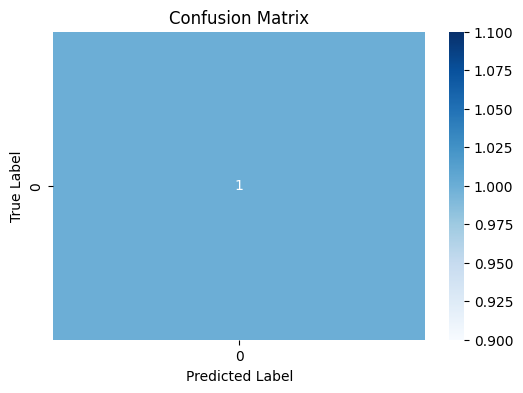

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 로드 (예: csv 파일 사용)
df = pd.read_csv('data.csv')

# 수치형 열만 선택하여 결측값 처리
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# 임의의 목표 열 생성 (이진 분류를 위한 0과 1로 구성된 변수)
df['target_column'] = np.random.randint(0, 2, size=len(df))

# 수치형 열만 선택하여 특성과 레이블 설정
X = df.select_dtypes(include=['number']).drop('target_column', axis=1)
y = df['target_column']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 결과
y_pred = model.predict(X_test)

# 성능 평가
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()
